# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Merge files -- NY
ny_df = pd.read_excel('/Users/jackiechen/Desktop/Data/NY/flights_NY.xlsx')
df1 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING.csv')
df2 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 2.csv')
df3 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 3.csv')
df4 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 4.csv')
df5 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 5.csv')
df6 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 6.csv')
df7 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 7.csv')
df8 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 8.csv')
df9 = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/T_ONTIME_REPORTING 9.csv')
ny_df=pd.concat([ny_df, df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)
ny_df = ny_df[(ny_df['YEAR'] >= 2019) & (ny_df['YEAR'] <=2020)]

In [3]:
# Merge files -- TX
tx_df = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/Texas.csv')
df1 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING.csv')
df2 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 2.csv')
df3 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 3.csv')
df4 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 4.csv')
df5 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 5.csv')
df6 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 6.csv')
df7 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 7.csv')
df8 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 8.csv')
df9 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/T_ONTIME_REPORTING 9.csv')
tx_df=pd.concat([tx_df, df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)
tx_df = tx_df[(tx_df['YEAR'] >= 2019) & (tx_df['YEAR'] <=2020)]

In [4]:
# Save files
ny_df.to_csv('/Users/jackiechen/Desktop/Data/NY/NY_DID.csv')
tx_df.to_csv('/Users/jackiechen/Desktop/Data/TX/TX_DID.csv')

In [5]:
# Format the date
ny_df = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/NY_DID.csv')
flight_date = [date.split()[0] for date in ny_df['FL_DATE'].tolist()]
ny_df['FL_DATE'] = flight_date
ny_df['FL_DATE'] = pd.to_datetime(ny_df['FL_DATE'])

tx_df = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/TX_DID.csv')
flight_date = [date.split()[0] for date in tx_df['FL_DATE'].tolist()]
tx_df['FL_DATE'] = flight_date
tx_df['FL_DATE'] = pd.to_datetime(tx_df['FL_DATE'])

<AxesSubplot:xlabel='FL_DATE'>

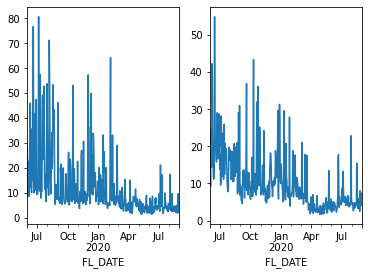

In [6]:
# Departure Delay Comparison
fig, axs = plt.subplots(1,2)

ny_df.groupby(['FL_DATE'])['DEP_DELAY_NEW'].mean().plot.line(ax=axs[0])
tx_df.groupby(['FL_DATE'])['DEP_DELAY_NEW'].mean().plot.line(ax=axs[1])

<AxesSubplot:xlabel='FL_DATE'>

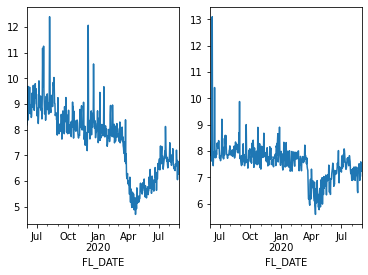

In [7]:
# Tax-in time Comparison

fig, axs = plt.subplots(1,2)

ny_df.groupby(['FL_DATE'])['TAXI_IN'].mean().plot.line(ax=axs[0])
tx_df.groupby(['FL_DATE'])['TAXI_IN'].mean().plot.line(ax=axs[1])

In [8]:
ny_df.to_csv('/Users/jackiechen/Desktop/Data/NY/NY_Flight_clean.csv')
tx_df.to_csv('/Users/jackiechen/Desktop/Data/TX/TX_Flight_clean.csv')

### Checkpoint

In [9]:
ny_df = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/NY_Flight_clean.csv')
tx_df = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/TX_Flight_clean.csv')

In [10]:
# Add in COVID case data 
ny_covid = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/New_York_State_Statewide_COVID-19_Testing.csv')
ny_covid['Test Date'] = pd.to_datetime(ny_covid['Test Date'])
ny_covid.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,2022-04-18,Albany,63,60129,483,1253006,12.41%,COUNTY
1,2022-04-17,Albany,54,60066,597,1252523,9.11%,COUNTY
2,2022-04-16,Albany,100,60012,1131,1251926,9.06%,COUNTY
3,2022-04-15,Albany,108,59912,1093,1250795,9.68%,COUNTY
4,2022-04-14,Albany,128,59804,1235,1249702,10.99%,COUNTY


<AxesSubplot:xlabel='Test Date'>

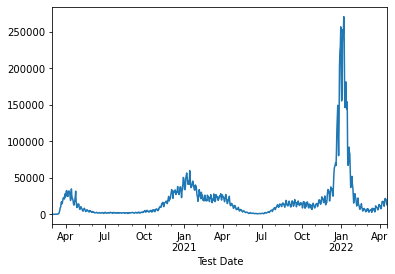

In [11]:
ny_covid.groupby(['Test Date'])['New Positives'].sum().plot.line()

In [12]:
ny_covid = pd.DataFrame(ny_covid.groupby(['Test Date'])['New Positives'].sum())
ny_covid.reset_index(inplace=True)
ny_covid.to_csv('/Users/jackiechen/Desktop/Data/NY/NewYork_covid_clean.csv')
ny_covid.head(5)

,Test Date,New Positives
0,2020-03-01,0
1,2020-03-02,3
2,2020-03-03,0
3,2020-03-04,6
4,2020-03-05,66


In [13]:
ny_covid['Test Date'] = ny_covid['Test Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [14]:
ny_df = ny_df.merge(ny_covid, how='left', left_on='FL_DATE', right_on='Test Date')
ny_df = ny_df.sort_values(['FL_DATE'])

In [15]:
tx_covid_20 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/Texas_covid_2020.csv').iloc[-1,]
tx_covid_21 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/Texas_covid_2021.csv').iloc[-1,]
tx_covid_22 = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/Texas_covid_2022.csv').iloc[-1,]

In [16]:
tx_covid = pd.DataFrame((tx_covid_20.append(tx_covid_21)).append(tx_covid_22))
tx_covid.drop(['County'], axis=0, inplace=True)
tx_covid.reset_index(inplace=True)
tx_covid.columns = ['Date', 'New Cases']
tx_covid = tx_covid[(tx_covid['Date'] != 'Unknown Date') & (tx_covid['Date'] != 'Total')]
tx_covid['Date'] = pd.to_datetime(tx_covid['Date'])
tx_covid.to_csv('/Users/jackiechen/Desktop/Data/TX/Texas_covid_clean.csv')

<AxesSubplot:xlabel='Date'>

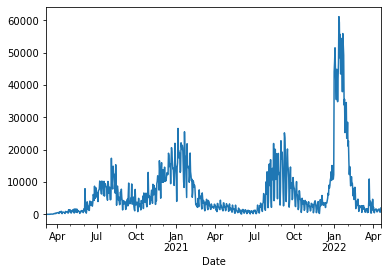

In [17]:
tx_covid.groupby(['Date'])['New Cases'].sum().plot.line()

In [18]:
tx_covid['Date'] = tx_covid['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [19]:
tx_df = tx_df.merge(tx_covid, how='left', left_on='FL_DATE', right_on='Date')

In [20]:
# Fill NA with zero
ny_df['New Positives'] = ny_df['New Positives'].fillna(0)
tx_df['New Cases'] = tx_df['New Cases'].fillna(0)

In [21]:
ny_df.to_csv('/Users/jackiechen/Desktop/Data/NY/NY_Flight_Covid.csv')
tx_df.to_csv('/Users/jackiechen/Desktop/Data/TX/TX_Flight_Covid.csv')

### Checkpoint

In [22]:
ny_df = pd.read_csv('/Users/jackiechen/Desktop/Data/NY/NY_Flight_Covid.csv')
tx_df = pd.read_csv('/Users/jackiechen/Desktop/Data/TX/TX_Flight_Covid.csv')

/Users/jackiechen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
ny_df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Test Date,New Positives
0,250204,250204,369587,2019,6,6,2019-06-01,G4,"Syracuse, NY","St. Petersburg, FL",...,2258,2226.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
1,249144,249144,368527,2019,6,6,2019-06-01,UA,"Houston, TX","New York, NY",...,2327,2326.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [24]:
tx_df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,New Cases
0,0,0,348321,2019,6,4,2019-06-06,DL,"Atlanta, GA","Dallas/Fort Worth, TX",...,1904,1849.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
1,1,1,348322,2019,6,4,2019-06-06,DL,"Austin, TX","Detroit, MI",...,1651,1626.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0


In [25]:
ny_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)
ny_df['State'] = 'NY'
tx_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)
tx_df['State'] = 'TX'
assert len(ny_df.columns) == len(tx_df.columns)

In [26]:
ny_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY_NEW', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Test Date', 'New Positives',
       'State'],
      dtype='object')

In [27]:
tx_df.columns = ny_df.columns

In [28]:
combined_df = pd.concat([ny_df, tx_df], axis=0)

In [29]:
# Set the Time Range
combined_df = combined_df[combined_df['FL_DATE'] <= '2020-05-31']

In [30]:
combined_df['Time'] = (combined_df['FL_DATE'] >= '2020-03-19') + 0
combined_df.head(2)

,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Test Date,New Positives,State,Time
0,2019,6,6,2019-06-01,G4,"Syracuse, NY","St. Petersburg, FL",2010,1951.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NY,0
1,2019,6,6,2019-06-01,UA,"Houston, TX","New York, NY",1900,1855.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NY,0


In [31]:
combined_df['Treated'] = (combined_df['State'] == 'NY') + 0
combined_df.head(2)

,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,...,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Test Date,New Positives,State,Time,Treated
0,2019,6,6,2019-06-01,G4,"Syracuse, NY","St. Petersburg, FL",2010,1951.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NY,0,1
1,2019,6,6,2019-06-01,UA,"Houston, TX","New York, NY",1900,1855.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NY,0,1


In [32]:
# Choose the useful columns
combined_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY_NEW', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Test Date', 'New Positives',
       'State', 'Time', 'Treated'],
      dtype='object')

In [33]:
combined_df = combined_df[['FL_DATE', 'DEP_DELAY_NEW', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'SECURITY_DELAY', 
                           'New Positives', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'New Positives',
                           'Time', 'Treated' ]]

In [34]:
combined_df.isna().sum()

FL_DATE                      0
DEP_DELAY_NEW            97920
TAXI_OUT                 99084
TAXI_IN                  99959
ARR_DELAY_NEW           104765
SECURITY_DELAY         1603856
New Positives                0
CARRIER_DELAY          1603856
LATE_AIRCRAFT_DELAY    1603856
New Positives                0
Time                         0
Treated                      0
dtype: int64

In [35]:
combined_df.dropna(inplace=True)

In [36]:
combined_df['diff_in_diff'] = combined_df['Time'] * combined_df['Treated']

In [37]:
combined_df.to_csv('diff_in_diff_data.csv')

# Difference in Difference Analysis

In [38]:
combined_df = pd.read_csv('diff_in_diff_data.csv')

In [39]:
# Building the model
import statsmodels.api as sm

output_dict = {}
col_list = ['DEP_DELAY_NEW', 'ARR_DELAY_NEW', 'TAXI_IN', 'TAXI_OUT', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY']

def did_analysis(col, output_dict):
    did_x = combined_df[['Time', 'Treated', 'diff_in_diff']]
    did_y = combined_df[col]
    did_x2 = sm.add_constant(did_x)
    est = sm.OLS(did_y, did_x2)
    model = est.fit()
    print(model.summary())
    output_dict[col] = model.params['diff_in_diff']
    
for col in col_list:
    did_analysis(col, output_dict)

                            OLS Regression Results                            
Dep. Variable:          DEP_DELAY_NEW   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     280.4
Date:                Sun, 01 May 2022   Prob (F-statistic):          8.65e-182
Time:                        21:56:21   Log-Likelihood:            -1.9784e+06
No. Observations:              330941   AIC:                         3.957e+06
Df Residuals:                  330937   BIC:                         3.957e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           62.2968      0.212    294.376   

In [40]:
output_dict

{'DEP_DELAY_NEW': 5.284148796583152,
 'ARR_DELAY_NEW': -1.8607355305134963,
 'TAXI_IN': -1.5240467953522088,
 'TAXI_OUT': -6.4832777058374536,
 'CARRIER_DELAY': 10.266427629196574,
 'LATE_AIRCRAFT_DELAY': -0.18873505097396936}

In [41]:
output_dict = {k: v for k, v in sorted(output_dict.items(), reverse=True, key=lambda item: item[1])}

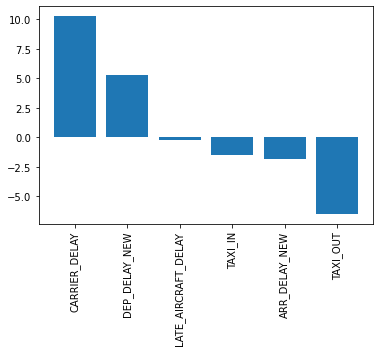

In [42]:
keys = output_dict.keys()
values = output_dict.values()
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.show()